In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics  # Import scikit-learn metrics module for accuracy calculation
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

In [ ]:
!pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:

# Load dataset
ds = pd.read_csv("CSF.csv", header=0)

# Preprocessing: Check for null values
ds = ds.replace(' ', np.nan)  # to get rid of empty values
nan_values = ds[ds.isna().any(axis=1)]  # to get all rows with Na
nan_values                                     # view df with NaN rows only

In [ ]:
# Split dataset in features and target label
features = ds.iloc[:, :-1]  # Features (all columns except the last)
label = ds.iloc[:, -1]  # Target variable (last column)

In [ ]:
label

In [ ]:
# Split dataset into training set and test set
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.25, random_state=20)  # 80% training and 20% test

In [ ]:
label_test

In [ ]:
from sklearn.feature_selection import SelectFromModel

features_train.columns = ['Age', 'CellCount', 'NeuroCOVID', 'Immunosupressed', 'Presentation', 'ClinicalMetagenomics', 'Top10']  # Replace with your actual feature names


# Create a decision tree classifier for feature importance
dt_for_feature_importance = DecisionTreeClassifier(criterion="entropy")
dt_for_feature_importance.fit(features_train, label_train)

# Use SelectFromModel with the correct feature names
model = SelectFromModel(dt_for_feature_importance, prefit=True)
features_train_selected = model.transform(features_train)
features_test_selected = model.transform(features_test)

# Get the selected feature indices
selected_feature_indices = model.get_support()

# Replace 'feature_names' with the actual column names from your DataFrame
# Filter the original feature names to keep only selected features
selected_feature_names = [features_train.columns[i] for i, is_selected in enumerate(selected_feature_indices) if is_selected]

# Print the selected feature names
print("Selected Feature Names:", selected_feature_names)

# Create DataFrames with selected features and set column names
features_train_selected = pd.DataFrame(features_train_selected, columns=selected_feature_names)
features_test_selected = pd.DataFrame(features_test_selected, columns=selected_feature_names)



In [ ]:
# Data Augmentation using SMOTE
smote = SMOTE(random_state=1)
features_train_augmented, label_train_augmented = smote.fit_resample(features_train_selected, label_train)

# Create and train Decision Tree Classifier with augmented data
DTCls = DecisionTreeClassifier(criterion="entropy")
DTCls.fit(features_train_augmented, label_train_augmented)

# Predict the response for test dataset with selected features
label_pred = DTCls.predict(features_test_selected)

# Model Accuracy
print("Accuracy:", metrics.accuracy_score(label_test, label_pred))


In [ ]:
# Data Augmentation using SMOTE
smote = SMOTE(random_state=1)
features_train_augmented, label_train_augmented = smote.fit_resample(features_train, label_train)

# Create and train Decision Tree Classifier with augmented data
DTCls = DecisionTreeClassifier(criterion="entropy")
DTCls.fit(features_train_augmented, label_train_augmented)

# Predict the response for test dataset with selected features
label_pred = DTCls.predict(features_test)

# Model Accuracy
print("Accuracy:", metrics.accuracy_score(label_test, label_pred))

In [ ]:
# Data Augmentation using SMOTE
smote = SMOTE(random_state=1)
features_train_augmented, label_train_augmented = smote.fit_resample(features_train, label_train)

# Create and train Decision Tree Classifier with augmented data
DTCls = DecisionTreeClassifier(criterion="gini")
DTCls.fit(features_train_augmented, label_train_augmented)

# Predict the response for test dataset with selected features
label_pred = DTCls.predict(features_test)

# Model Accuracy
print("Accuracy:", metrics.accuracy_score(label_test, label_pred))

In [ ]:
pip install matplotlib

In [99]:


label_train_augmented = pd.DataFrame({'FinalDiagnosis': label_train_augmented})


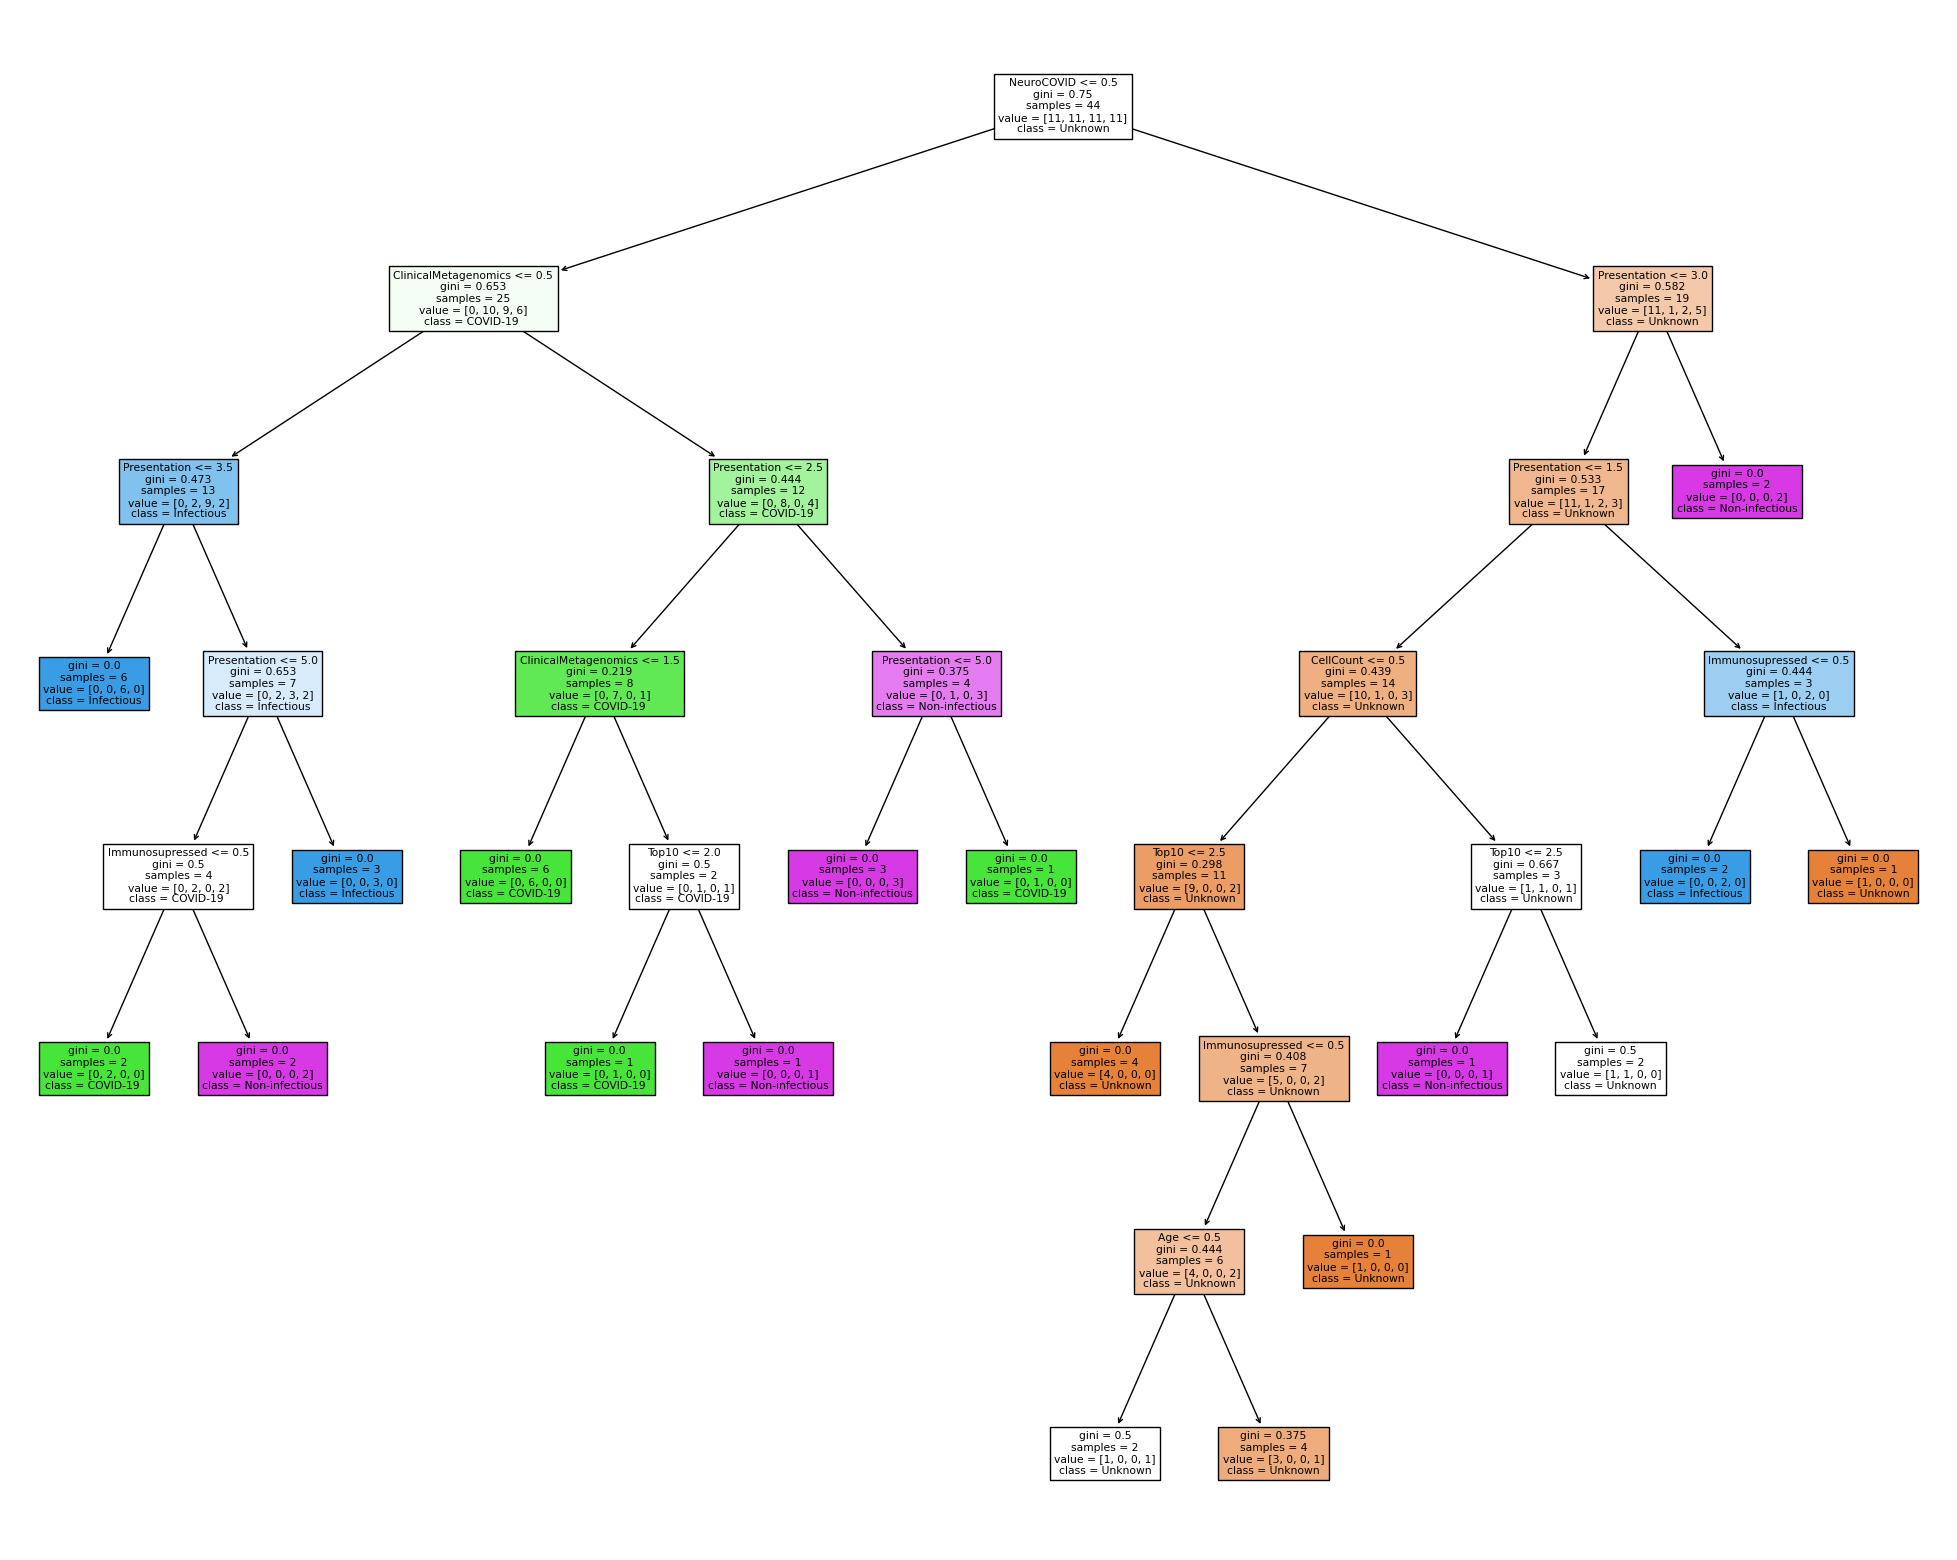

In [100]:
from matplotlib import pyplot as plt
from sklearn import tree


fn=features_train_augmented.columns.values.tolist()
ln=label_train_augmented.columns.values.tolist()
lnname=label_train_augmented['FinalDiagnosis'].unique().tolist()
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DTCls,
                   feature_names=fn,
                class_names=lnname,
                   filled=True)
fig.savefig('DecisionTree')